In [52]:
import sys
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import csv


### detect contact points and generate path

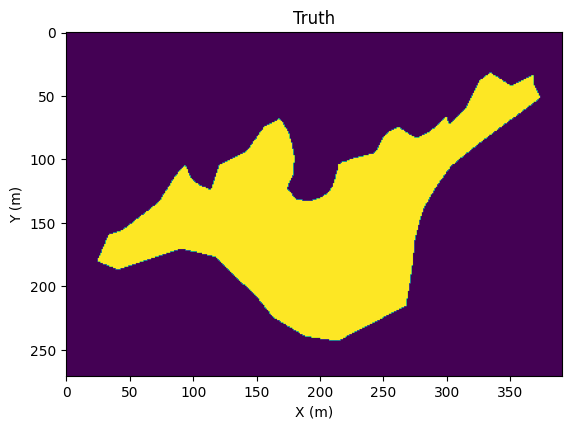

In [240]:
truth = cv2.imread('../data/data_gen_case/imgs/truth4.png', cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(truth, 80, 255, cv2.THRESH_BINARY)
# thresh = (1 - ((thresh / 255) - 1) * -1)
thresh = (1 - ((thresh / 255)))
truth = thresh

plt.title('Truth')
plt.ylabel('Y (m)'), plt.xlabel('X (m)')
plt.imshow(truth)
plt.show()

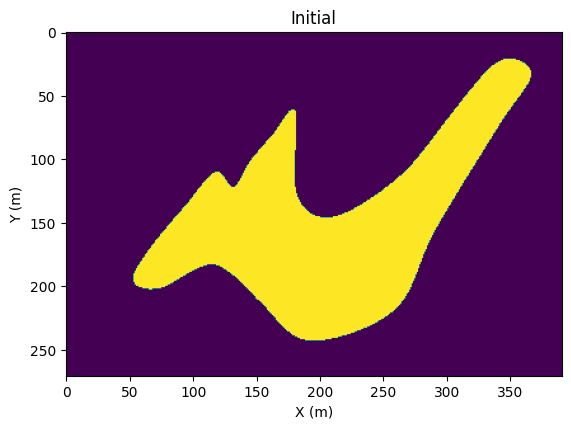

In [242]:
initial = cv2.imread('../data/data_gen_case/imgs/fake4.png', cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(initial, 80, 255, cv2.THRESH_BINARY)
# thresh = (1 - ((thresh / 255) - 1) * -1)
thresh = (1 - ((thresh / 255)))
initial = thresh

plt.title('Initial')
plt.ylabel('Y (m)'), plt.xlabel('X (m)')
plt.imshow(initial)
plt.show()

In [229]:
def find_contacts_litho(img, orientation, num):
    contacts = []
    litho = []
    if(orientation == 'horizontal'):
        prev = 0
        for x in range(0, len(img[num]), 1):
            if(img[num][x] != prev):
                if(prev == 1):
                    contacts.append(x - 1)
                else:
                    contacts.append(x)
                prev = img[num][x]
            litho.append(prev)
    elif (orientation == 'vertical'):
        prev = 0
        for x in range(0, len(img), 1):
            if(img[x][num] != prev):
                if(prev == 1):
                    contacts.append(x - 1)
                else:
                    contacts.append(x)
                prev = img[x][num]
            litho.append(prev)

    return contacts, litho

# if edge is a rock it will have an error since it is a 0

In [230]:
def create_contacts_csv(title, orientation, x, depth, litho, contacts):
    with open(title + '_contacts.csv', mode='w', newline='') as file:
        writer = csv.writer(file)

        header = ['x', 'depth', 'litho', 'contacts']
        writer.writerow(header)
        
        if (orientation == 'horizontal'):
            for i in range(0, x, 1):
                row = []
                if i in contacts:
                    row = [i, depth, litho[i//1], 1]
                else:
                    row = [i, depth, litho[i//1],'']
                writer.writerow(row)
        elif (orientation == 'vertical'):
            for i in range(0, depth, 1): # depth):
                row = []
                if i in contacts:
                    row = [x, i, litho[i//1], 1]
                else:
                    row = [x, i, litho[i//1],'']
                writer.writerow(row)

    print("file saved: " + title + "_contacts.csv")

In [244]:
truth_contacts, truth_litho = find_contacts_litho(truth, "vertical", len(truth) // 2)
print(truth_contacts)
create_contacts_csv("img4", "vertical", len(truth) // 2, len(truth), truth_litho, truth_contacts)

[97, 194]
file saved: img4_contacts.csv


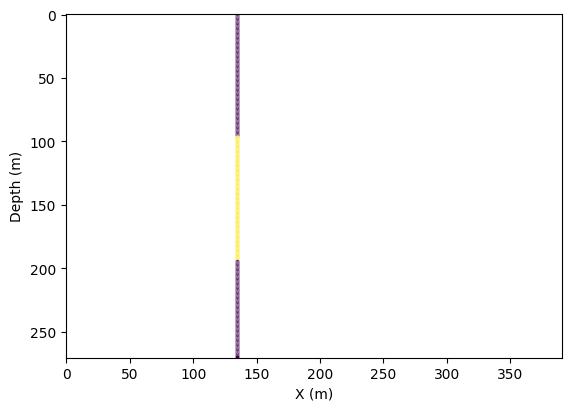

In [247]:
path_contacts = pd.read_csv("img4_contacts.csv")

plt.imshow(truth, alpha = 0)
plt.scatter(path_contacts['x'], path_contacts['depth'],
            c=path_contacts['litho'], edgecolors='w', linewidths=0.3,s = 10)
plt.ylabel('Depth (m)'), plt.xlabel('X (m)')
plt.show()
